In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [3]:
df = pd.read_csv("./datasets/fixed_battery_log.csv")
df = df.drop(df.columns[0],axis=1)
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [4]:
df["weekday"] = df["date"].dt.dayofweek
df["time_to_num"]=df["date"].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

In [5]:
def Frequency_Distribution(data, class_width=None):
    data = np.asarray(data)
    if class_width is None:
        class_size = int(np.log2(data.size).round()) + 1
        class_width = round((data.max() - data.min()) / class_size)

    bins = np.arange(0, data.max()+class_width+1, class_width)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                         '度数': hist,
                         '累積度数': cumsum,
                         '相対度数': hist / cumsum[-1],
                         '累積相対度数': cumsum / cumsum[-1]},
                        index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                                        for i in range(hist.size)],
                                       name='階級'))

Frequency_Distribution(df

In [21]:
for i in range(len(users)):
    User_F_data = Frequency_Distribution(df.loc[(df["User"] == users[i]) & 
                                                (df["state"] == "ON") & 
                                                (df["date"] > dt.datetime(2021,12,1)) & 
                                                (df["date"] < dt.datetime(2022,1,31))]["battery"])
    print(User_F_data)
#     User_F_data.plot.bar(x="階級値",y="度数",width=1,ec="k")
#     plt.savefig("bs_2_results/%s_%d.jpg" % (users[i],i))

             階級値  度数  累積度数      相対度数    累積相対度数
階級                                            
0以上12未満      6.0   5     5  0.034722  0.034722
12以上24未満    18.0  16    21  0.111111  0.145833
24以上36未満    30.0  32    53  0.222222  0.368056
36以上48未満    42.0  21    74  0.145833  0.513889
48以上60未満    54.0  28   102  0.194444  0.708333
60以上72未満    66.0  22   124  0.152778  0.861111
72以上84未満    78.0  11   135  0.076389  0.937500
84以上96未満    90.0   6   141  0.041667  0.979167
96以上108未満  102.0   3   144  0.020833  1.000000
            階級値  度数  累積度数      相対度数    累積相対度数
階級                                           
0以上10未満     5.0   0     0  0.000000  0.000000
10以上20未満   15.0   1     1  0.007463  0.007463
20以上30未満   25.0   7     8  0.052239  0.059701
30以上40未満   35.0  19    27  0.141791  0.201493
40以上50未満   45.0  42    69  0.313433  0.514925
50以上60未満   55.0  41   110  0.305970  0.820896
60以上70未満   65.0  18   128  0.134328  0.955224
70以上80未満   75.0   5   133  0.037313  0.992537
80以上90未満   85.0   0   1

In [56]:
for i in range(0,7):
    User_F_data_2 = Frequency_Distribution(df.loc[(df["User"] == "Narita") & 
                                                (df["state"] == "ON") & 
                                                (df["date"] > dt.datetime(2021,12,1)) & 
                                                (df["date"] < dt.datetime(2022,1,31)) &
                                                (df["weekday"] == i)]["battery"])
#     User_F_data_2.plot.bar(x="階級値",y="度数",width=1,ec="k")
#     plt.savefig("bs_2_results/%s_%d.jpg" % (users[i],i))

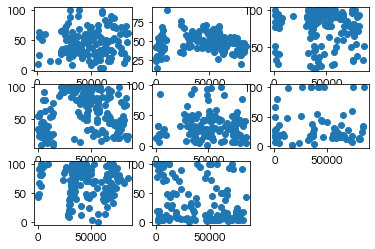

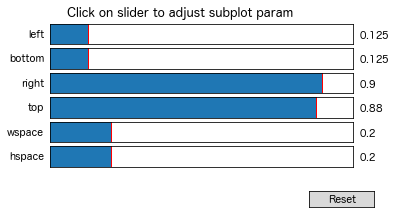

<Figure size 432x288 with 0 Axes>

In [20]:
# fig,ax = plt.subplots(3,3)
for i in range(len(users)):
    user_data = df.loc[(df["User"] == users[i]) & 
                        (df["state"] == "ON") & 
                            (df["date"] > dt.datetime(2021,12,1)) & 
                                (df["date"] < dt.datetime(2022,1,31))]
    
    plt.subplot(3,3,i+1)
    plt.plot(user_data["time_to_num"],user_data["battery"],"o")

plt.show()

In [23]:
Nari_data_12 = df.loc[(df["User"] == "Narita") & 
                     (df["state"] == "ON") & 
                       (df["date"] > dt.datetime(2021,12,1)) & 
                         (df["date"] < dt.datetime(2021,12,31))]

In [25]:
Nari_data_1 = df.loc[(df["User"] == "Narita") & 
                     (df["state"] == "ON") & 
                       (df["date"] > dt.datetime(2022,1,1)) & 
                         (df["date"] < dt.datetime(2022,1,31))]

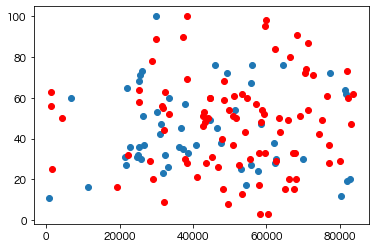

In [26]:
plt.plot(Nari_data_12["time_to_num"],Nari_data_12["battery"],"o")
plt.plot(Nari_data_1["time_to_num"],Nari_data_1["battery"],"o",color="r")
plt.show()

In [59]:
Nari_data_b_and_tnum = Nari_data.loc[:,["time_to_num","battery"]]

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
model_lr = LinearRegression()
std_scaler = StandardScaler()
std_scaler.fit(Nari_data_b_and_tnum)
df_std = pd.DataFrame(std_scaler.transform(Nari_data_b_and_tnum), columns=Nari_data_b_and_tnum.columns)
x = df_std[["time_to_num"]]
y = df_std[["battery"]]
model_lr.fit(x,y)

LinearRegression()

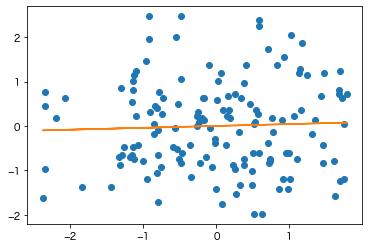

モデル関数の回帰変数 w1: 0.041976
モデル関数の切片 w2: -0.000
y= 0.041976x + -0.000
決定係数 R^2：  0.0017619929041250426


In [72]:
plt.plot(x, y, 'o')
plt.plot(x, model_lr.predict(x), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %f' %model_lr.coef_)
print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
print('y= %fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('決定係数 R^2： ', model_lr.score(x, y))